<a href="https://colab.research.google.com/github/omyahro/Data_200_Royals/blob/main/ORoyals_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Definition:**

The Food Access Research Atlas provides a geographic analysis of food accessibility in low-income and other census tracts using various measures of supermarket proximity. It includes data on food access for populations within these tracts and offers census-tract-level information that can be used for research or community planning.


https://catalog.data.gov/dataset/food-access-research-atlas


In [3]:
pip install sqlite-database

In [27]:
# Import the libraries
import sqlite3
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 1. Load dataset (uploaded file path)
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = "/content/drive/My Drive/Food_Access_Research_Atlas.csv"

# Read the Excel file
food_access = pd.read_csv(file_path)
df = pd.read_csv(file_path)

Mounted at /content/drive


In [6]:

conn = sqlite3.connect('food_access.db')  # or use full path if needed
cur = conn.cursor()


In [7]:
conn = sqlite3.connect('/content/drive/My Drive/food_access.db')
df.to_sql('food_access', conn, if_exists='replace', index=False)

72531

In [10]:
# Create a cursor to interact with the database.
#cur.execute('DROP TABLE Athletes')

In [12]:
# First table
cur.execute('''CREATE TABLE IF NOT EXISTS Athletes (
    athlete_id INTEGER PRIMARY KEY,
    name TEXT,
    sport TEXT,
    country TEXT
)''')

conn.commit()

In [13]:
# Second table
cur.execute('''CREATE TABLE IF NOT EXISTS Medals (
    medal_id INTEGER PRIMARY KEY,
    athlete_id INTEGER,
    olympic_medals INTEGER,
    FOREIGN KEY (athlete_id) REFERENCES Athletes(athlete_id)
)''')
conn.commit()

In [15]:
cur.execute("INSERT INTO Athletes VALUES (1, 'Simone Biles', 'Gymnastics', 'USA')")
cur.execute("INSERT INTO Athletes VALUES (2, 'Usain Bolt', 'Track & Field', 'Jamaica')")

conn.commit()

In [16]:
cur.execute("INSERT INTO Medals VALUES (1, 1, 7)")
cur.execute("INSERT INTO Medals VALUES (2, 2, 8)")
conn.commit()

In [24]:
# JOIN tables
cur.execute('''SELECT name, sport, olympic_medals
FROM Athletes JOIN Medals ON Athletes.athlete_id = Medals.athlete_id''')

cur.fetchall()


[('Simone Biles', 'Gymnastics', 7),
 ('Usain Bolt', 'Track & Field', 8),
 ('Wilma Rudolph', 'Track & Field', 3)]

In [19]:
cur.execute("SELECT * FROM Athletes WHERE sport = 'Track & Field'")
cur.fetchall()

[(2, 'Usain Bolt', 'Track & Field', 'Jamaica')]

In [20]:
#Athletes with more than 6 medals
cur.execute('''SELECT name, olympic_medals
FROM Athletes JOIN Medals ON Athletes.athlete_id = Medals.athlete_id
WHERE olympic_medals > 6''')

cur.fetchall()

[('Simone Biles', 7), ('Usain Bolt', 8)]

In [21]:
# Delete rows with NULLs
cur.execute("DELETE FROM Athletes WHERE name IS NULL OR sport IS NULL")
cur.execute("DELETE FROM Medals WHERE olympic_medals IS NULL")
conn.commit()


In [22]:
# Adding new row
cur.execute("INSERT INTO Athletes VALUES (3, 'Wilma Rudolph', 'Track & Field', 'USA')")
cur.execute("INSERT INTO Medals VALUES (3, 3, 3)")
conn.commit()


In [23]:
cur.execute("SELECT * FROM Athletes")
cur.fetchall()

[(1, 'Simone Biles', 'Gymnastics', 'USA'),
 (2, 'Usain Bolt', 'Track & Field', 'Jamaica'),
 (3, 'Wilma Rudolph', 'Track & Field', 'USA')]

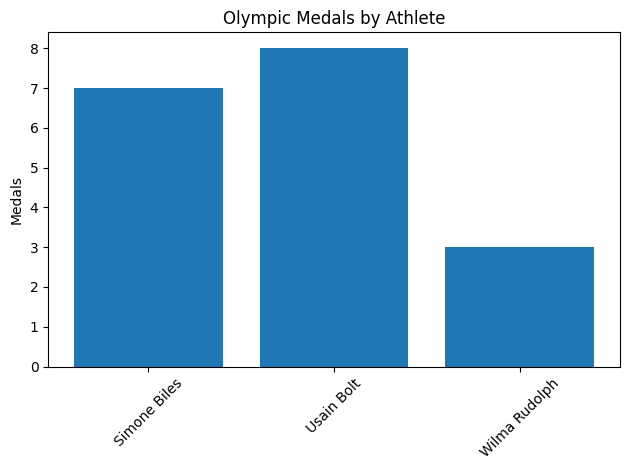

In [28]:
cur.execute('''
SELECT Athletes.name, Medals.olympic_medals
FROM Athletes
JOIN Medals ON Athletes.athlete_id = Medals.athlete_id
''')
data = cur.fetchall()

names = []
medals = []

for row in data:
    names.append(row[0])
    medals.append(row[1])

# Visualization
plt.bar(names, medals)
plt.title('Olympic Medals by Athlete')
plt.ylabel('Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()